## Polarity with Anne Frank's journal entries
This notebook includes functions that takes in journal entries into a nlp model and returns the individual and cummulative polarities for each journal entries and each sentence in a given journal entry (temporarily indexed by date).

In [146]:
# imports
from bs4 import BeautifulSoup
import urllib.request
import re
import json
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [147]:
# retrieving Anne Frank data for polarity testing 
def retrieve_data_from_url(url):
    list_8 = []
    dict_8 = {}
    r= urllib.request.urlopen(url).read()
    soup = BeautifulSoup(r, 'lxml')

    for points in soup.find_all('pre'):
        point = str(points.text)
    
    lst = point.split("\n")
    lst = [i for i in lst if i]
    lst = lst[229:]

    r = re.compile("[A-Z]+, [A-Z]+ [0-9]{2}[ ]?,[ ]?[0-9]{4}.*")
    filtered_list = list(filter(r.match, lst))
    filtered_lst_index = []
    
    
    diary_dict = dict.fromkeys(filtered_list)
    for i in filtered_list:
        filtered_lst_index.append(lst.index(i))
        
    dict_index = 0
    
    for i in range(len(filtered_lst_index) - 1):
        beginning = filtered_lst_index[i] + 1
        end = filtered_lst_index[i + 1]
        entry = lst[beginning: end]
        string = ''.join(entry)
        diary_dict[filtered_list[dict_index]] = string
        dict_index = dict_index + 1
        
    filtered = {k: v for k, v in diary_dict.items() if v is not None}
    diary_dict.clear()
    diary_dict.update(filtered)
    diary_sent = diary_dict.copy()
    diary_keys = list(diary_dict.keys())
    for i in diary_keys:
        diary_sent[i] = diary_sent[i].split(".")
    return diary_dict, diary_sent

diary_dict, diary_sent = retrieve_data_from_url('https://archive.org/stream/AnneFrankTheDiaryOfAYoungGirl_201606/Anne-Frank-The-Diary-Of-A-Young-Girl_djvu.txt')



In [148]:
# each entry
def entry_polarity(diary_dict):
    diary_keys = list(diary_dict.keys())
    return_dict = dict.fromkeys(diary_keys)
    entry_dict = dict.fromkeys(diary_keys)
    
    sia = SentimentIntensityAnalyzer()
    # polarity for each entry
    for i in diary_keys:
        entry = diary_dict[i]
        temp_dict = sia.polarity_scores(entry)
        edu = TextBlob(entry)
        x = edu.sentiment.polarity
        temp_dict['cummulative'] = x
        return_dict[i] = temp_dict

    return return_dict

       

In [149]:
# each sentence in an entry
# useful for lower-level analysis and looking into a single day/entry
def sentence_polarity(entry):
    sentences = diary_sent[entry]
    return_dict = {entry: None}
    sentence_dict = dict.fromkeys(sentences)
    return_dict[entry] = sentence_dict

    sia = SentimentIntensityAnalyzer()
    for i in sentences:
        temp_dict = sia.polarity_scores(i)
        edu = TextBlob(i)
        x = edu.sentiment.polarity
        temp_dict['cummulative'] = x
        return_dict[entry][i] = temp_dict
        
    return return_dict 


## Testing:
Test to see if models/functions are working correctly and the expected outputs are being returned

In [150]:
entry_polarity1 = entry_polarity(diary_dict) 

In [168]:
entry_polarity1

{'SATURDAY, JUNE 20,1942 ': {'neg': 0.117,
  'neu': 0.778,
  'pos': 0.105,
  'compound': -0.8272,
  'cummulative': 0.13583179483914778},
 'SATURDAY, JUNE 20, 1942 ': {'neg': 0.078,
  'neu': 0.79,
  'pos': 0.132,
  'compound': 0.9707,
  'cummulative': 0.027772938443670157},
 'SUNDAY, JUNE 21, 1942 ': {'neg': 0.07,
  'neu': 0.796,
  'pos': 0.134,
  'compound': 0.9942,
  'cummulative': 0.0912210012210012},
 'WEDNESDAY, JUNE 24, 1942 ': {'neg': 0.065,
  'neu': 0.826,
  'pos': 0.109,
  'compound': 0.9997,
  'cummulative': 0.1161258611460225},
 'FRIDAY, JULY 10, 1942 ': {'neg': 0.084,
  'neu': 0.896,
  'pos': 0.021,
  'compound': -0.9751,
  'cummulative': -0.055265980265980265},
 'SATURDAY, JULY 11, 1942 ': {'neg': 0.106,
  'neu': 0.832,
  'pos': 0.061,
  'compound': -0.9848,
  'cummulative': 0.09152534113060433},
 'SUNDAY, JULY 12, 1942 ': {'neg': 0.077,
  'neu': 0.796,
  'pos': 0.127,
  'compound': 0.9841,
  'cummulative': 0.07868217054263565},
 'FRIDAY, AUGUST 14, 1942 ': {'neg': 0.038,
 

In [166]:
# Test if entry_polarity includes all entries in original journal
len(entry_polarity1) == len(diary_dict)

True

In [171]:
sentence_polarity1 = sentence_polarity('SATURDAY, JUNE 20,1942 ') 

In [154]:
sentence_polarity2 = sentence_polarity('SUNDAY, JUNE 21, 1942 ') 

In [172]:
sentence_polarity1

{'SATURDAY, JUNE 20,1942 ': {'Writing in a diary is a really strange experience for someone like me': {'neg': 0.154,
   'neu': 0.662,
   'pos': 0.184,
   'compound': 0.1045,
   'cummulative': -0.05},
  " Not only because I've never written anything before, but also because it seems to me that later on neither I nor anyone else will be interested in the musings of a thirteen- year- old schoolgirl": {'neg': 0.0,
   'neu': 0.9,
   'pos': 0.1,
   'compound': 0.5499,
   'cummulative': 0.0875},
  " Oh well, it doesn't matter": {'neg': 0.174,
   'neu': 0.486,
   'pos': 0.34,
   'compound': 0.2561,
   'cummulative': 0.0},
  ' I feel like writing, and I have an even greater need to get all kinds of things off my chest': {'neg': 0.0,
   'neu': 0.762,
   'pos': 0.238,
   'compound': 0.6124,
   'cummulative': 0.5},
  ' "Paper has more patience than people': {'neg': 0.0,
   'neu': 1.0,
   'pos': 0.0,
   'compound': 0.0,
   'cummulative': 0.5},
  '" I thought of this saying on one of those days when

In [156]:
sentence_polarity2

{'SUNDAY, JUNE 21, 1942 ': {'Dearest Kitty, Our entire class is quaking in its boots': {'neg': 0.177,
   'neu': 0.567,
   'pos': 0.255,
   'compound': 0.2732,
   'cummulative': 0.0},
  " The reason, of course, is the upcoming meeting in which the teachers decide who'll be promoted to the next grade and who'll be kept back": {'neg': 0.0,
   'neu': 0.896,
   'pos': 0.104,
   'compound': 0.4215,
   'cummulative': 0.0},
  ' Half the class is making bets': {'neg': 0.0,
   'neu': 1.0,
   'pos': 0.0,
   'compound': 0.0,
   'cummulative': -0.16666666666666666},
  ' G': {'neg': 0.0,
   'neu': 0.0,
   'pos': 0.0,
   'compound': 0.0,
   'cummulative': 0.0},
  'Z': {'neg': 0.0,
   'neu': 0.0,
   'pos': 0.0,
   'compound': 0.0,
   'cummulative': 0.0},
  ' and I laugh ourselves sick at the two boys behind us, C': {'neg': 0.221,
   'neu': 0.537,
   'pos': 0.242,
   'compound': 0.0772,
   'cummulative': -0.2714285714285714},
  'N': {'neg': 0.0,
   'neu': 0.0,
   'pos': 0.0,
   'compound': 0.0,
   'cum

In [157]:
# Test if sentence_polarity includes all entries in original journal
sentences = diary_sent['SUNDAY, JUNE 21, 1942 ']
len(set(sentences)) == len(sentence_polarity2['SUNDAY, JUNE 21, 1942 '])


True

In [158]:
lst = []
for i in entry_polarity1.keys():
    val = entry_polarity1[i]['cummulative']
    lst.append(val)

In [159]:
import matplotlib.pyplot as plt

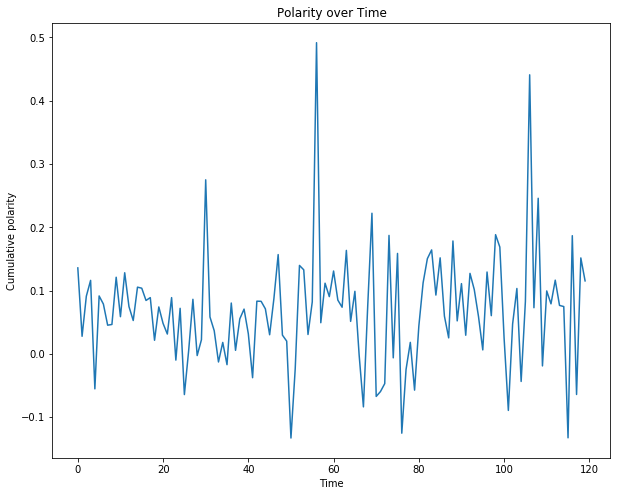

In [162]:
plt.figure(figsize=(10,8))
plt.plot(lst)
plt.xlabel("Time")
plt.ylabel("Cumulative polarity")
plt.title("Polarity over Time")
plt.show()